# 시가총액 데이터셋(marcap) 튜토리얼 - 데이터 읽기

<img src="https://i.imgur.com/b9t5FAA.png?1" width="60%">

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 시가총액(marcap) 데이터셋의 구성

시가총액(marcap) 데이터셋은 1995-05-02 ~ 2020-12-31 (25년간)일자별, 18개 컬럼, 1천만건 데이터 입니다. 압축하지 않은 상태에서  약 '1.6G' 분량 입니다.

** github 저장소에 현재 날짜 데이터까지 매일 자동 업데이트 됩니다.** 
따라서 git 저장소를 pull 하시면 매일 전종목 가격 데이터를 업데이트 하실 수 있습니다. 

https://github.com/FinanceData/marcap

* 컬럼: 18개
* 건수: 11,099,879 건(row)
* 크기: 1.6G


#### 컬럼 구성(18개)
Date (날짜)를 인덱스(DatetimeIndex)로 포함하고 있으며, 컬럼 구성은 다음과 같습니다.

* Date : 날짜 (DatetimeIndex)
* Rank: 시가총액 순위 (당일)
* Code : 종목코드
* Name : 종명이름 
* Open : 시가
* High : 고가
* Low : 저가
* Close : 종가
* Volume : 거래량
* Amount : 거래대금
* Changes : 전일대비
* ChangeCode: 등락 기호
* ChagesRatio : 전일대비 등락률
* Marcap : 시가총액(백만원)
* Stocks : 상장주식수
* MarketId : 시장기호	
* Market : 시장
* Dept : 부서(한국거래소)


## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

git 명령으로 깃허브의 저장소를 복제(clone)합니다. 데이터와 데이터를 읽는데 도움이 되는 간단한 파이썬 유틸리티 함수가 포함되어 있습니다.
 

In [1]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

Cloning into 'marcap'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 350 (delta 30), reused 31 (delta 16), pack-reused 302
Receiving objects: 100% (350/350), 1.96 GiB | 45.33 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Checking out files: 100% (34/34), done.


#### git 설치 참고 (윈도우+아나콘다를 사용하는 경우)
만일 git 이 설치되어 있지 않다면,  다음과 같이 `아나콘다 프롬프트`에서 간단하게 git을 설치할 수 있습니다.

```bash
C:\Users\plusjune>conda install git
```



## 데이터 파일 구성 살펴보기

데이터는 ./marcap/data 디렉토리에 있으며 년도별 CSV 파일로 구성되어 있습니다. 개별 파일은 .gz으로 압축되어 있습니다.

In [2]:
!ls -lh marcap/data

total 505M
-rw-r--r-- 1 root root 6.8M Jan 24 01:48 marcap-1995.csv.gz
-rw-r--r-- 1 root root  11M Jan 24 01:48 marcap-1996.csv.gz
-rw-r--r-- 1 root root  12M Jan 24 01:48 marcap-1997.csv.gz
-rw-r--r-- 1 root root  12M Jan 24 01:48 marcap-1998.csv.gz
-rw-r--r-- 1 root root  12M Jan 24 01:48 marcap-1999.csv.gz
-rw-r--r-- 1 root root  15M Jan 24 01:48 marcap-2000.csv.gz
-rw-r--r-- 1 root root  16M Jan 24 01:48 marcap-2001.csv.gz
-rw-r--r-- 1 root root  18M Jan 24 01:48 marcap-2002.csv.gz
-rw-r--r-- 1 root root  18M Jan 24 01:48 marcap-2003.csv.gz
-rw-r--r-- 1 root root  18M Jan 24 01:48 marcap-2004.csv.gz
-rw-r--r-- 1 root root  19M Jan 24 01:48 marcap-2005.csv.gz
-rw-r--r-- 1 root root  20M Jan 24 01:48 marcap-2006.csv.gz
-rw-r--r-- 1 root root  21M Jan 24 01:48 marcap-2007.csv.gz
-rw-r--r-- 1 root root  22M Jan 24 01:48 marcap-2008.csv.gz
-rw-r--r-- 1 root root  22M Jan 24 01:48 marcap-2009.csv.gz
-rw-r--r-- 1 root root  22M Jan 24 01:48 marcap-2010.csv.gz
-rw-r--r-- 1 root root  23M J

##  1년치 데이터 읽어오기

pandas에서 CSV 파일을 직접 지정하여 1년치 데이터를 한번에 읽어 올 수 있습니다.

`Code`(종목코드)는 숫자로만 구성되어 있고 0으로 시작할 수 있으므로 명시적으로 str 타입으로 지정해 주는 것이 좋습니다. 또한, `Date`(날짜)는 날짜시간 타입으로 파싱하도록 지정합니다. 

In [3]:
import pandas as pd

df = pd.read_csv('marcap/data/marcap-2021.csv.gz', dtype={'Code':str}, parse_dates=['Date'])
df.head(10)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
0,005930,삼성전자,KOSPI,NaN,83000.0,1,2000.0,2.47,81000.0,84400.0,80200.0,38655276.0,3.185357e+12,4.954920e+14,5969782550,STK,1,2021-01-04
1,000660,SK하이닉스,KOSPI,NaN,126000.0,1,7500.0,6.33,124500.0,128000.0,120500.0,7995016.0,9.942765e+11,9.172830e+13,728002365,STK,2,2021-01-04
2,051910,LG화학,KOSPI,NaN,889000.0,1,65000.0,7.89,849000.0,900000.0,835000.0,858451.0,7.479297e+11,6.275659e+13,70592343,STK,3,2021-01-04
3,005935,삼성전자우,KOSPI,NaN,74400.0,1,800.0,1.09,73700.0,75300.0,73600.0,5455139.0,4.056852e+11,6.122277e+13,822886700,STK,4,2021-01-04
4,207940,삼성바이오로직스,KOSPI,NaN,829000.0,1,3000.0,0.36,819000.0,838000.0,804000.0,182864.0,1.498895e+11,5.485078e+13,66165000,STK,5,2021-01-04
5,035420,NAVER,KOSPI,NaN,293000.0,1,500.0,0.17,291500.0,294000.0,285500.0,947178.0,2.746358e+11,4.812917e+13,164263395,STK,6,2021-01-04
6,068270,셀트리온,KOSPI,NaN,347500.0,2,-11500.0,-3.20,351500.0,354500.0,343000.0,2006483.0,6.982387e+11,4.691174e+13,134997805,STK,7,2021-01-04
7,006400,삼성SDI,KOSPI,NaN,671000.0,1,43000.0,6.85,660000.0,682000.0,640000.0,694737.0,4.605973e+11,4.614100e+13,68764530,STK,8,2021-01-04
8,005380,현대차,KOSPI,NaN,207500.0,1,15500.0,8.07,194000.0,211000.0,193500.0,5651695.0,1.162238e+12,4.433615e+13,213668187,STK,9,2021-01-04
9,035720,카카오,KOSPI,NaN,396000.0,1,6500.0,1.67,392000.0,396500.0,385500.0,853740.0,3.353581e+11,3.502088e+13,88436556,STK,10,2021-01-04


In [4]:
# 2020년 데이터 CSV 읽기
import pandas as pd

df = pd.read_csv('marcap/data/marcap-2020.csv.gz', dtype={'Code':str}, parse_dates=['Date'])
df.head(10)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
0,005930,삼성전자,KOSPI,NaN,55200.0,2,-600.0,-1.08,55500.0,56000.0,55000.0,12993228.0,7.196632e+11,3.295320e+14,5969782550,STK,1,2020-01-02
1,000660,SK하이닉스,KOSPI,NaN,94700.0,1,600.0,0.64,96000.0,96200.0,94100.0,2342070.0,2.228414e+11,6.894182e+13,728002365,STK,2,2020-01-02
2,005935,삼성전자우,KOSPI,NaN,45600.0,1,200.0,0.44,45750.0,45950.0,45150.0,1512362.0,6.894333e+10,3.752363e+13,822886700,STK,3,2020-01-02
3,035420,NAVER,KOSPI,NaN,182500.0,2,-4000.0,-2.14,187500.0,188000.0,182000.0,300640.0,5.530956e+10,3.007844e+13,164813395,STK,4,2020-01-02
4,207940,삼성바이오로직스,KOSPI,NaN,428500.0,2,-4500.0,-1.04,433000.0,439500.0,425500.0,108281.0,4.647975e+10,2.835170e+13,66165000,STK,5,2020-01-02
5,005380,현대차,KOSPI,NaN,118000.0,2,-2500.0,-2.07,121000.0,121000.0,118000.0,556532.0,6.620498e+10,2.521285e+13,213668187,STK,6,2020-01-02
6,012330,현대모비스,KOSPI,NaN,247500.0,2,-8500.0,-3.32,254500.0,256000.0,247500.0,214585.0,5.362298e+10,2.358841e+13,95306694,STK,7,2020-01-02
7,068270,셀트리온,KOSPI,NaN,180000.0,2,-1000.0,-0.55,181000.0,183000.0,176000.0,621826.0,1.113250e+11,2.310081e+13,128337853,STK,8,2020-01-02
8,051910,LG화학,KOSPI,NaN,314000.0,2,-3500.0,-1.10,321000.0,321000.0,313500.0,139496.0,4.418112e+10,2.216600e+13,70592343,STK,9,2020-01-02
9,005490,POSCO,KOSPI,NaN,236000.0,2,-500.0,-0.21,236000.0,240000.0,234500.0,213578.0,5.061737e+10,2.057609e+13,87186835,STK,10,2020-01-02


2020년 1년치 데이터의 전체 건수는 다음과 같습니다

In [5]:
len(df)

585456

## 유틸리티 함수

marcap 시가총액 데이터셋에는 데이터를 날짜별로 혹은 기간과 특정 종목을 지정하여 손쉽게 읽기 위한 유틸함수가 있습니다. <br>

### marcap_data(start, end=None, code=None)
지정한 기간 데이터 읽어옵니다. 종목코드(code)를 지정하면 해당 종목에 대한 데이터를 지정한 기간만큼 읽어 옵니다. 거래량(volume)이 0인 행(row)는 제거하고 반환합니다.

다음과 같이 import 하여 사용합니다.



In [6]:
from marcap import marcap_data

### 특정 날짜를 지정하여 읽기

In [7]:
df = marcap_data('2021-01-21')
len(df)

2420

In [8]:
df.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2021-01-21,005930,삼성전자,KOSPI,NaN,88100,1,900,1.03,87500,88600,86500,25318011,2211209788500,525937842655000,5969782550,STK,1
2021-01-21,000660,SK하이닉스,KOSPI,NaN,131500,1,1000,0.77,131500,133000,130000,3067677,402667707500,95732310997500,728002365,STK,2
2021-01-21,051910,LG화학,KOSPI,NaN,988000,2,-12000,-1.20,1011000,1019000,988000,364628,363389190000,69745234884000,70592343,STK,3
2021-01-21,005935,삼성전자우,KOSPI,NaN,77600,1,800,1.04,77500,77800,76800,2512634,194360911300,63856007920000,822886700,STK,4
2021-01-21,005380,현대차,KOSPI,NaN,264500,1,5500,2.12,264000,266500,259500,2593509,682782686000,56515235461500,213668187,STK,5


### 기간을 지정하여 읽기 (2020년 1년간 전종목)

In [9]:
df = marcap_data('2020-01-01', '2020-12-31')
df

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2020-01-02,005930,삼성전자,KOSPI,NaN,55200,2,-600,-1.08,55500,56000,55000,12993228,719663194492,329531996760000,5969782550,STK,1
2020-01-02,000660,SK하이닉스,KOSPI,NaN,94700,1,600,0.64,96000,96200,94100,2342070,222841408700,68941823965500,728002365,STK,2
2020-01-02,005935,삼성전자우,KOSPI,NaN,45600,1,200,0.44,45750,45950,45150,1512362,68943333400,37523633520000,822886700,STK,3
2020-01-02,035420,NAVER,KOSPI,NaN,182500,2,-4000,-2.14,187500,188000,182000,300640,55309555500,30078444587500,164813395,STK,4
2020-01-02,207940,삼성바이오로직스,KOSPI,NaN,428500,2,-4500,-1.04,433000,439500,425500,108281,46479752500,28351702500000,66165000,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,240340,인터코스,KONEX,일반기업부,750,3,0,0.00,750,750,750,1,750,2509742250,3346323,KNX,2525
2020-12-30,242350,피엔아이컴퍼니,KONEX,일반기업부,414,2,-35,-7.80,445,445,397,12793,5202747,1971269280,4761520,KNX,2527
2020-12-30,224020,에스케이씨에스,KONEX,일반기업부,680,1,80,13.33,680,680,680,430,292400,1836000000,2700000,KNX,2529


In [10]:
df.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2020-01-02,005930,삼성전자,KOSPI,NaN,55200,2,-600,-1.08,55500,56000,55000,12993228,719663194492,329531996760000,5969782550,STK,1
2020-01-02,000660,SK하이닉스,KOSPI,NaN,94700,1,600,0.64,96000,96200,94100,2342070,222841408700,68941823965500,728002365,STK,2
2020-01-02,005935,삼성전자우,KOSPI,NaN,45600,1,200,0.44,45750,45950,45150,1512362,68943333400,37523633520000,822886700,STK,3
2020-01-02,035420,NAVER,KOSPI,NaN,182500,2,-4000,-2.14,187500,188000,182000,300640,55309555500,30078444587500,164813395,STK,4
2020-01-02,207940,삼성바이오로직스,KOSPI,NaN,428500,2,-4500,-1.04,433000,439500,425500,108281,46479752500,28351702500000,66165000,STK,5


In [11]:
df.tail()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2020-12-30,240340,인터코스,KONEX,일반기업부,750,3,0,0.00,750,750,750,1,750,2509742250,3346323,KNX,2525
2020-12-30,242350,피엔아이컴퍼니,KONEX,일반기업부,414,2,-35,-7.80,445,445,397,12793,5202747,1971269280,4761520,KNX,2527
2020-12-30,224020,에스케이씨에스,KONEX,일반기업부,680,1,80,13.33,680,680,680,430,292400,1836000000,2700000,KNX,2529
2020-12-30,179720,옐로페이,KONEX,일반기업부,2430,4,315,14.89,2400,2430,2400,300,728850,1796985000,739500,KNX,2530
2020-12-30,225860,엠앤씨생명과학,KONEX,일반기업부,144,1,2,1.41,128,154,128,3329,475447,1635565248,11358092,KNX,2531


### 기간을 지정하여, 특정 종목 읽기 (2020년 1년간 특정 종목)


In [12]:
df = marcap_data('2021-01-01', '2021-01-31', code='005930')
len(df)

14

In [13]:
df[['Code', 'Name', 'Close', 'Volume', 'Marcap', 'Stocks']].head(10)

,Code,Name,Close,Volume,Marcap,Stocks
Date,,,,,,
2021-01-04,005930,삼성전자,83000,38655276,495491951650000,5969782550
2021-01-05,005930,삼성전자,83900,35335669,500864755945000,5969782550
2021-01-06,005930,삼성전자,82200,42089013,490716125610000,5969782550
2021-01-07,005930,삼성전자,82900,32644642,494894973395000,5969782550
2021-01-08,005930,삼성전자,88800,59013307,530116690440000,5969782550
2021-01-11,005930,삼성전자,91000,90306177,543250212050000,5969782550
2021-01-12,005930,삼성전자,90600,48682416,540862299030000,5969782550
2021-01-13,005930,삼성전자,89700,36068848,535489494735000,5969782550
2021-01-14,005930,삼성전자,89700,26393970,535489494735000,5969782550


In [14]:
# 특정일, 특정 종목 읽기
marcap_data('2021-01-21', code='005930')

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2021-01-21,005930,삼성전자,KOSPI,NaN,88100,1,900,1.03,87500,88600,86500,25318011,2211209788500,525937842655000,5969782550,STK,1


## 데이터 전체 읽기
시가총액(marcap) 데이터셋은 1995-05-02 ~ 2021-01-15일까지 25년 데이터를 모두  읽어들이려면 다음과 같이 읽습니다.


In [15]:
df_marcap = marcap_data('1995-05-02', '2021-01-15')
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,267810,앙츠,KONEX,일반기업부,1550,2,-250,-13.89,1550,1600,1550,1504,2331610,2397850000,1547000,KNX,2525
2021-01-15,225850,미애부,KONEX,일반기업부,670,3,0,0.00,670,670,670,50,33500,2232663110,3332333,KNX,2526
2021-01-15,224020,에스케이씨에스,KONEX,일반기업부,650,1,70,12.07,650,650,650,1,650,1998750000,3075000,KNX,2528


인덱스(DatetimeIndex)포함 18개의 컬럼을 가지고 있으며, 1천만건이 넘는 데이터 건수를 포함하고 있습니다. 

In [16]:
len(df_marcap)

11099879

데이터프레임에 대한 전반적인 정보는 다음과 같습니다

In [17]:
df_marcap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11099879 entries, 1995-05-02 to 2021-01-15
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Code         object 
 1   Name         object 
 2   Market       object 
 3   Dept         object 
 4   Close        int64  
 5   ChangeCode   object 
 6   Changes      int64  
 7   ChagesRatio  float64
 8   Open         int64  
 9   High         int64  
 10  Low          int64  
 11  Volume       int64  
 12  Amount       int64  
 13  Marcap       int64  
 14  Stocks       int64  
 15  MarketId     object 
 16  Rank         int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 1.5+ GB


## 일자별 시가총액

시가총액은 말그대로 기업의 규모 자체 입니다. 시장 전체에서 차지하는 시가총액의 비중을 살펴본다면 기업이 우리나라 산업 전체에서 차지하는 비중을 살펴볼 수 있다는 뜻이 되죠. 

In [18]:
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,267810,앙츠,KONEX,일반기업부,1550,2,-250,-13.89,1550,1600,1550,1504,2331610,2397850000,1547000,KNX,2525
2021-01-15,225850,미애부,KONEX,일반기업부,670,3,0,0.00,670,670,670,50,33500,2232663110,3332333,KNX,2526
2021-01-15,224020,에스케이씨에스,KONEX,일반기업부,650,1,70,12.07,650,650,650,1,650,1998750000,3075000,KNX,2528


In [19]:
marcap_daily = df_marcap.groupby('Date').sum()['Marcap']
marcap_daily

Date
1995-05-02     134713479923960
1995-05-03     137255450392250
1995-05-04     137395277384830
1995-05-06     137122266028070
1995-05-08     136361070157380
                    ...       
2021-01-11    2556140698402270
2021-01-12    2539389518593471
2021-01-13    2555060321900568
2021-01-14    2556402104529020
2021-01-15    2508508338186183
Name: Marcap, Length: 6517, dtype: int64

2021-01-15 현재 상장주식시가총액은 2,508조 입니다

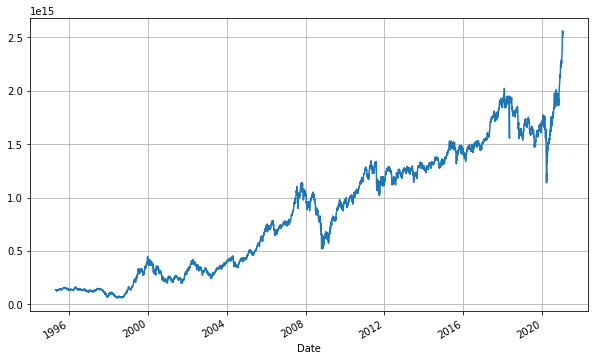

In [23]:
marcap_daily.plot(figsize=(10,6), grid=True)

## 요약
* 한국거래소(KRX)에서 일자별 데이터를 지난 26년간 수집한 시가총액 순위 데이터  입니다.
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상, 16G 용량입니다.
* Github를 통해 손쉽게 가져다 쓸 수 있습니다.
* 데이터를 읽어오는 유틸리티 함수(marcap_data)를 함께 제공합니다.
* 매일 자동 업데이트 됩니다.

시장연구와 투자에 도움이 되시길 바랍니다.

#### 2018 - 2021 [FinanceData.KR]()